# Anime dataset analysis

In [103]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [104]:
df=pd.read_csv('anime.csv')

In [105]:
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [107]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [108]:
df.dropna(subset=['rating'],inplace=True) # dropping rows which has no rating value

In [109]:
df.isna().sum()

anime_id     0
name         0
genre       47
type         0
episodes     0
rating       0
members      0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12064 non-null int64
name        12064 non-null object
genre       12017 non-null object
type        12064 non-null object
episodes    12064 non-null object
rating      12064 non-null float64
members     12064 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 754.0+ KB


#### changing datatype of episode attribute and replacing 'unknown' value to 0

In [111]:
df['episodes']=df['episodes'].apply(lambda x: int(x) if x!='Unknown' else 0) 
df['episodes'].dtype

dtype('int64')

In [112]:
df.describe().drop('anime_id',axis=1)

,episodes,rating,members
count,12064.000000,12064.000000,1.206400e+04
mean,12.253316,6.473902,1.827952e+04
std,46.668767,1.026746,5.527578e+04
min,0.000000,1.670000,1.200000e+01
25%,1.000000,5.880000,2.210000e+02
50%,2.000000,6.570000,1.539000e+03
75%,12.000000,7.180000,9.485500e+03
max,1818.000000,10.000000,1.013917e+06


#### top 5 highest rated anime

In [113]:
df.sort_values('rating',ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,0,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44


#### top 5 anime which has highest members

In [114]:
df.sort_values('members',ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


#### top 5 anime which has rating greator than 9 and has more than 100k members

In [115]:
df[(df['rating']>9) & (df['members']>100000)].head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


From above information, we can conclude that 'Kimi no Na wa' anime movie is highest rated in any category which has more than 100k members and 'Fullmetal Alchemist: Brotherhood' is highest rated anime series which has more than 100k members.

#### show which has maximum number of episodes

In [116]:
df[df['episodes']==df['episodes'].max()]

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160


#### total number of anime shows/movies in each category/type

In [117]:
gb=df.groupby('type')["anime_id"].count()
gb
# OVA stands for 'Original video animation' and ONA stands for 'Original net animation'

type
Movie      2297
Music       488
ONA         652
OVA        3285
Special    1671
TV         3671
Name: anime_id, dtype: int64

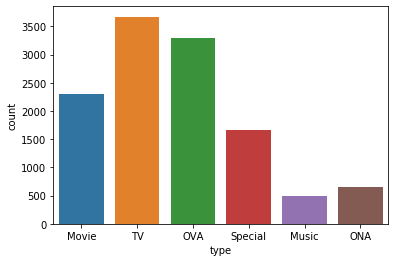

In [118]:
sns.countplot(x='type',data=df)

## now we analyze data on the basis of user profile who watched these anime shows

In [119]:
profile=pd.read_csv('profiles.csv')
profile.head(5)

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [120]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
profile            81727 non-null object
gender             53856 non-null object
birthday           46807 non-null object
favorites_anime    81727 non-null object
link               81727 non-null object
dtypes: object(5)
memory usage: 3.1+ MB


In [121]:
profile[profile['profile']=='DesolatePsyche']

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
26947,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
30156,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
31973,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
79299,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche


In [122]:
profile.drop_duplicates(inplace=True)
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47902 entries, 0 to 77662
Data columns (total 5 columns):
profile            47902 non-null object
gender             30890 non-null object
birthday           26859 non-null object
favorites_anime    47902 non-null object
link               47902 non-null object
dtypes: object(5)
memory usage: 2.2+ MB


In [123]:
profile[profile['profile']=='DesolatePsyche']

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche


In [124]:
profile['gender'].unique()

array(['Male', 'Female', nan, 'Non-Binary'], dtype=object)

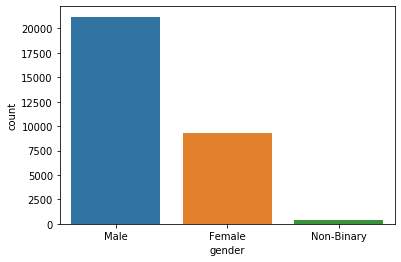

In [125]:
sns.countplot(x='gender',data=profile)

#### above plot shows anime is more popular in males

In [126]:
pr=profile.dropna(subset=['birthday'])

In [127]:
pr['year'] = pd.to_datetime(pr['birthday'], errors = 'coerce').dt.year
pr.head(5)

,profile,gender,birthday,favorites_anime,link,year
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche,1994.0
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans,2000.0
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00,NaN
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99,1999.0
6,Waffle_Empress,NaN,"May 29, 1996","['338', '322', '440', '199', '28223', '12815',...",https://myanimelist.net/profile/Waffle_Empress,1996.0


In [128]:
pr.dropna(subset=['year'],inplace=True)
pr.head(5)

,profile,gender,birthday,favorites_anime,link,year
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche,1994.0
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans,2000.0
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99,1999.0
6,Waffle_Empress,NaN,"May 29, 1996","['338', '322', '440', '199', '28223', '12815',...",https://myanimelist.net/profile/Waffle_Empress,1996.0
7,NIGGER_BONER,Male,"Jan 1, 1985","['11061', '30', '6594', '28701', '10087', '674...",https://myanimelist.net/profile/NIGGER_BONER,1985.0


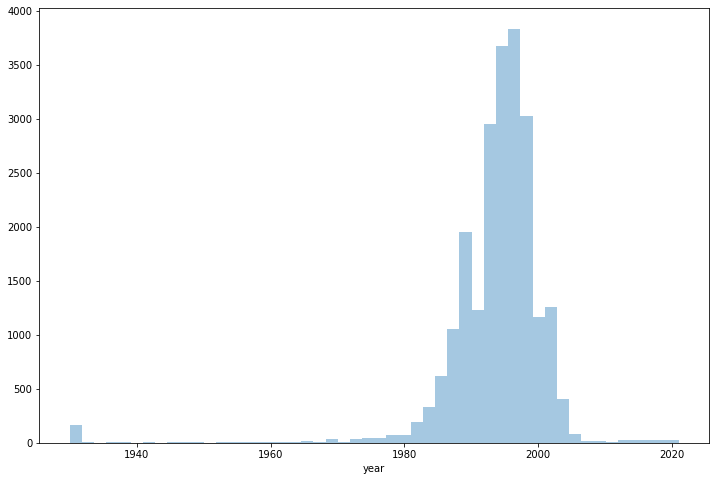

In [129]:
plt.figure(figsize=(12,8))
sns.distplot(pr['year'],kde=False)

#### We can conclude that anime is more popular around the people who born in between 1990 to 2000

## now we analyze data which is based on the reviews given by the users

In [130]:
reviews=pd.read_csv('reviews.csv')
reviews.head(5)

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [131]:
reviews.drop(['link','text','scores'],axis=1,inplace=True)

In [132]:
reviews[reviews['uid']==255938]

,uid,profile,anime_uid,score
0,255938,DesolatePsyche,34096,8
60897,255938,DesolatePsyche,34096,8


In [133]:
reviews.drop_duplicates(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130519 entries, 0 to 182637
Data columns (total 4 columns):
uid          130519 non-null int64
profile      130519 non-null object
anime_uid    130519 non-null int64
score        130519 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.0+ MB


In [134]:
reviews[reviews['uid']==255938]

,uid,profile,anime_uid,score
0,255938,DesolatePsyche,34096,8


In [135]:
reviews[reviews['profile']=='DesolatePsyche']

,uid,profile,anime_uid,score
0,255938,DesolatePsyche,34096,8
2089,255793,DesolatePsyche,12403,6
3170,298207,DesolatePsyche,35073,6
3658,255795,DesolatePsyche,23225,7
4306,291256,DesolatePsyche,2035,8
...,...,...,...,...
171268,264298,DesolatePsyche,3269,6
171557,254406,DesolatePsyche,4549,7
173151,256154,DesolatePsyche,30014,7
175262,261743,DesolatePsyche,33589,7


In [136]:
profile.drop(['birthday','favorites_anime','link'],inplace=True,axis=1)

In [137]:
re1=pd.merge(reviews,profile, on='profile')
re1.head(5)

,uid,profile,anime_uid,score,gender
0,255938,DesolatePsyche,34096,8,Male
1,255793,DesolatePsyche,12403,6,Male
2,298207,DesolatePsyche,35073,6,Male
3,255795,DesolatePsyche,23225,7,Male
4,291256,DesolatePsyche,2035,8,Male


In [138]:
re1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130718 entries, 0 to 130717
Data columns (total 5 columns):
uid          130718 non-null int64
profile      130718 non-null object
anime_uid    130718 non-null int64
score        130718 non-null int64
gender       93957 non-null object
dtypes: int64(3), object(2)
memory usage: 6.0+ MB


In [139]:
df['anime_uid']=df['anime_id']

In [140]:
re1=pd.merge(df.drop(['episodes','rating','members','anime_id'],axis=1),re1,on='anime_uid')

In [141]:
re1.head(5)

,name,genre,type,anime_uid,uid,profile,score,gender
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,267093,DesolatePsyche,9,Male
1,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,255046,Waffle_Empress,3,NaN
2,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,279849,ggultra2764,6,Male
3,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,233283,tinypinkghostie,10,Female
4,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,292331,BabyGirl06301,9,Female


In [142]:
re1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107184 entries, 0 to 107183
Data columns (total 8 columns):
name         107184 non-null object
genre        107152 non-null object
type         107184 non-null object
anime_uid    107184 non-null int64
uid          107184 non-null int64
profile      107184 non-null object
score        107184 non-null int64
gender       79506 non-null object
dtypes: int64(3), object(5)
memory usage: 7.4+ MB


In [143]:
len(re1['anime_uid'].unique()) # total anime shows on which we have data

6783

In [144]:
re1[re1['anime_uid']==32281]

,name,genre,type,anime_uid,uid,profile,score,gender
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,267093,DesolatePsyche,9,Male
1,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,255046,Waffle_Empress,3,NaN
2,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,279849,ggultra2764,6,Male
3,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,233283,tinypinkghostie,10,Female
4,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,292331,BabyGirl06301,9,Female
...,...,...,...,...,...,...,...,...
713,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,228893,robiu013,5,Male
714,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,229093,Zephariel,5,Male
715,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,223224,TheKillerAngel,10,NaN
716,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,32281,223037,manofmanymanga,10,Male


#### let's find out in which gender category, given anime is more popular, for eg we are now giving anime_uid=32281 which is anime_uid for 'Kimi no Na wa'

[Text(0.5, 1.0, 'Kimi no Na wa')]

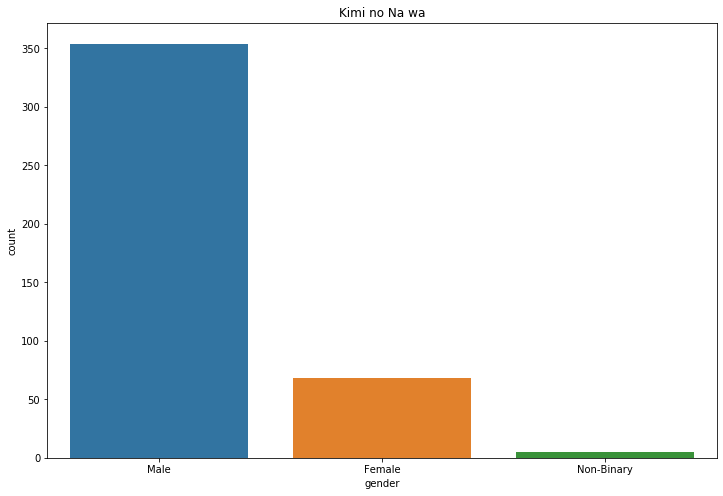

In [145]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender',data=re1[re1['anime_uid']==32281]).set(title='Kimi no Na wa')

#### we can see 'Kimi no Na wa' is more popular in males.

#### let's find out average score given by the users for a given anime, for eg we are now giving anime_uid=32281 which is anime_uid for 'Kimi no Na wa'

In [146]:
x=sum(re1[re1['anime_uid']==32281]['score'])//len(re1[re1['anime_uid']==32281]['score'])

In [147]:
print("Average of scores given by the users for anime",re1[re1['anime_uid']==32281]['name'][0],"=",x)

Average of scores given by the users for anime Kimi no Na wa. = 8
